In [2]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.testing as tm

In [3]:
#ML Packages
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [6]:
#load dataset
data = pd.read_excel("penyakit_jantung.xlsx")
data.head()

,Usia,Jenis Kelamin,Tekanan Darah Saat Istirahat,Kolesterol,Gula Darah Saat Puasa,Detak Jantung Maksimal,Penyakit Jantung
0,40,M,140,289,0,172,0
1,49,F,160,180,0,156,1
2,37,M,130,283,0,98,0
3,48,F,138,214,0,108,1
4,54,M,150,195,0,122,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Usia                          918 non-null    int64 
 1   Jenis Kelamin                 918 non-null    object
 2   Tekanan Darah Saat Istirahat  918 non-null    int64 
 3   Kolesterol                    918 non-null    int64 
 4   Gula Darah Saat Puasa         918 non-null    int64 
 5   Detak Jantung Maksimal        918 non-null    int64 
 6   Penyakit Jantung              918 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 50.3+ KB


In [8]:
data.describe()

,Usia,Tekanan Darah Saat Istirahat,Kolesterol,Gula Darah Saat Puasa,Detak Jantung Maksimal,Penyakit Jantung
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000


In [9]:
#check jika ada missing value
data.isna().sum()

Usia                            0
Jenis Kelamin                   0
Tekanan Darah Saat Istirahat    0
Kolesterol                      0
Gula Darah Saat Puasa           0
Detak Jantung Maksimal          0
Penyakit Jantung                0
dtype: int64

In [10]:
data.keys()

Index(['Usia', 'Jenis Kelamin', 'Tekanan Darah Saat Istirahat', 'Kolesterol',
       'Gula Darah Saat Puasa', 'Detak Jantung Maksimal ', 'Penyakit Jantung'],
      dtype='object')

In [11]:
data.values

array([[40, 'M', 140, ..., 0, 172, 0],
       [49, 'F', 160, ..., 0, 156, 1],
       [37, 'M', 130, ..., 0, 98, 0],
       ...,
       [57, 'M', 130, ..., 0, 115, 1],
       [57, 'F', 130, ..., 0, 174, 1],
       [38, 'M', 138, ..., 0, 173, 0]], dtype=object)

In [12]:
data.shape

(918, 7)

In [14]:
#target distribusi
print(data.groupby('Penyakit Jantung').size())

Penyakit Jantung
0    410
1    508
dtype: int64


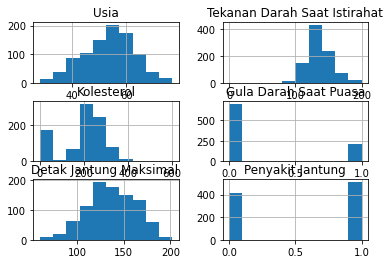

In [17]:
#histogram 
data.hist()
plt.show()

<AxesSubplot:>

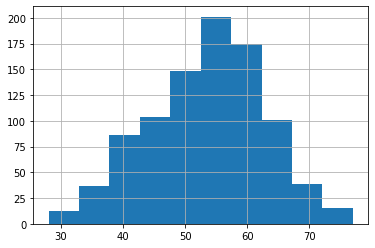

In [18]:
data['Usia'].hist()

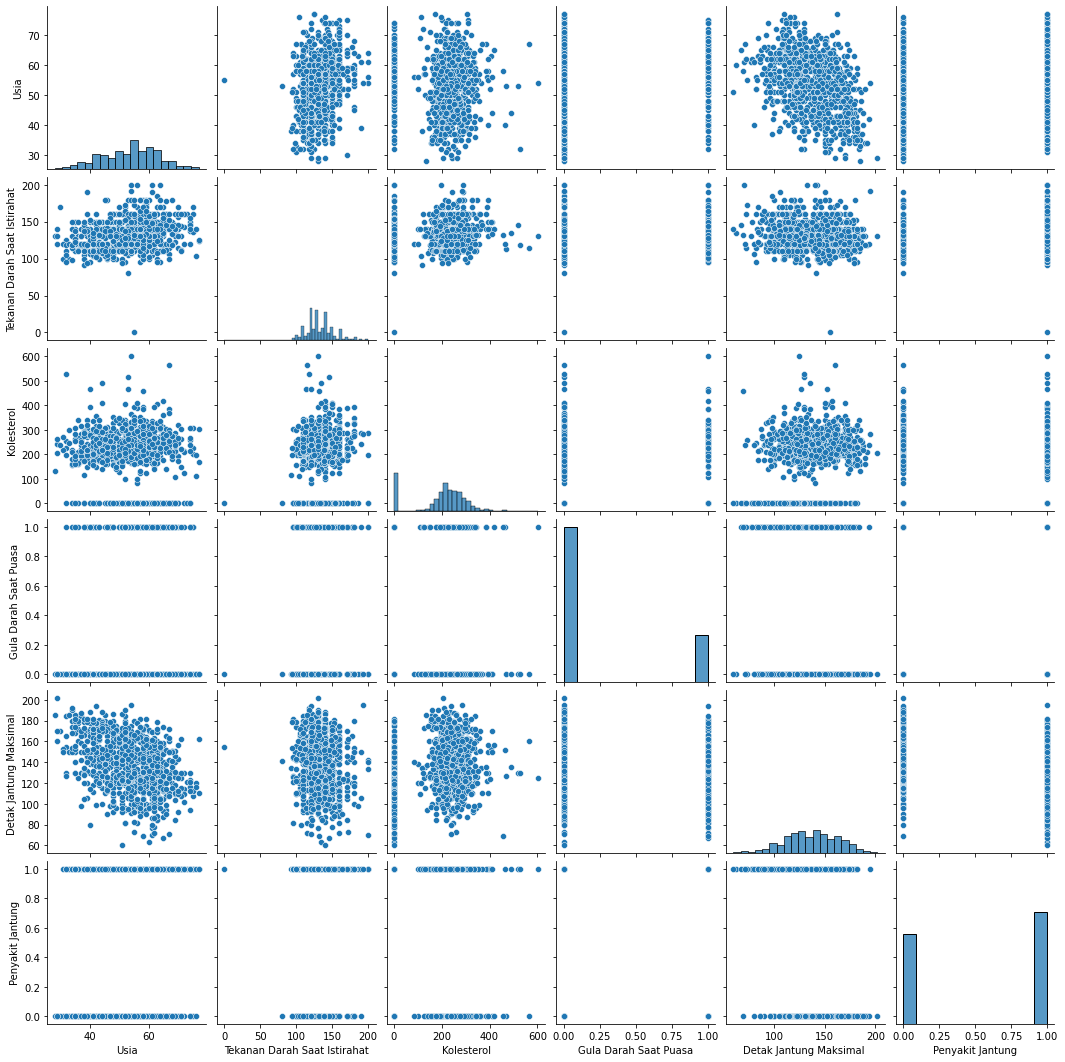

In [19]:
#multivariate plot
sns.pairplot(data)

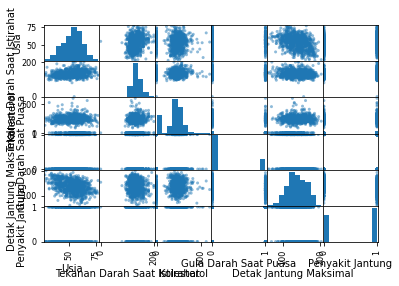

In [20]:
#scatter plot
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.show()

c:\Users\srula\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Penyakit Jantung', ylabel='count'>

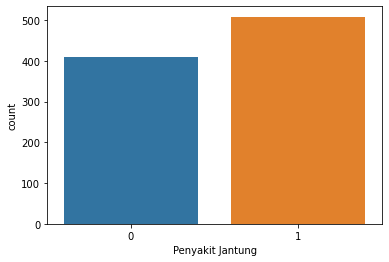

In [21]:
sns.countplot(data['Penyakit Jantung'])

In [28]:
#Ubah data dengan tipe data object menjadi numerical dengan menggunakan Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder
#backup dataset
dataset = data.copy()
#encode categorical data 
ordnl_enc = OrdinalEncoder()
data[['Jenis Kelamin']] = ordnl_enc.fit_transform(data[['Jenis Kelamin']])

In [29]:
#splitting validation
array = dataset.values
x = array[:,0:6]
y = array[:,-1]
x

array([[ 40.,   1., 140., 289.,   0., 172.],
       [ 49.,   0., 160., 180.,   0., 156.],
       [ 37.,   1., 130., 283.,   0.,  98.],
       ...,
       [ 57.,   1., 130., 131.,   0., 115.],
       [ 57.,   0., 130., 236.,   0., 174.],
       [ 38.,   1., 138., 175.,   0., 173.]])

In [30]:
y

array([0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 1.

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=3)

In [32]:
x_train

array([[ 57.,   1., 150., 276.,   0., 112.],
       [ 62.,   0., 140., 394.,   0., 157.],
       [ 51.,   1.,  95.,   0.,   1., 126.],
       ...,
       [ 49.,   1., 130., 341.,   0., 120.],
       [ 65.,   0., 150., 225.,   0., 114.],
       [ 43.,   1., 150., 247.,   0., 171.]])

In [33]:
y_train

array([1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 0.

In [34]:
x_test

array([[ 47.,   1., 110., 275.,   0., 118.],
       [ 55.,   1., 120.,   0.,   0., 125.],
       [ 56.,   1., 137., 208.,   1., 122.],
       ...,
       [ 53.,   1., 180., 285.,   0., 120.],
       [ 65.,   0., 140., 417.,   1., 157.],
       [ 37.,   1., 130., 250.,   0., 187.]])

In [35]:
y_test

array([1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0.])

In [36]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
logistic_model = LogisticRegression(random_state=0)
logistic_model.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [37]:
y_predict = logistic_model.predict(x_test)
y_predict

array([1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0.])

In [38]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[61, 25],
       [17, 81]], dtype=int64)

<AxesSubplot:>

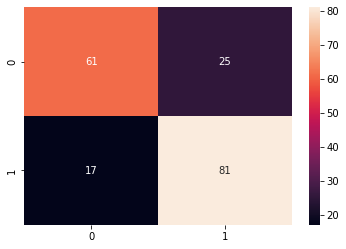

In [39]:
sns.heatmap(cm, annot=True)

In [40]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74        86
         1.0       0.76      0.83      0.79        98

    accuracy                           0.77       184
   macro avg       0.77      0.77      0.77       184
weighted avg       0.77      0.77      0.77       184



In [41]:
print("accuracy : ", logistic_model.score(x_test,y_test))

accuracy :  0.7717391304347826


In [42]:
#individual prediction
sample = np.array([10,1,100,100,1,100])
sample1 = sample.reshape(1,-1)
logistic_model.predict(sample1)

array([1.])

In [33]:
import pickle
Pkl_Filename = "logistic_model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(logistic_model, file)

In [34]:
#load back
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)
Pickled_LR_Model

LogisticRegression(random_state=0)